In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import acquire as a
import prepare as p
import model as m
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = a.acquire_readmes()
df = p.prep_df_for_nlp(df,'readme_contents')
train,validate,test = p.split_data(df,'language')

In [3]:
results = m.tune_hypers(train,validate)

In [4]:
dt_avg = (results['dt_train'] + results['dt_valid'])/2
rf_avg = (results['rf_train'] + results['rf_valid'])/2
xg_avg = (results['xg_train'] + results['xg_valid'])/2


In [6]:
dt_avg.idxmax()

'22'

In [26]:
max_depth = rf_avg.max().idxmax()
min_samples_leaf = rf_avg.loc[:,max_depth].idxmax()
max_depth, min_samples_leaf

('n_estimators_23', '2')

In [27]:
xg_max_depth = xg_avg.max().idxmax()
xg_min_samples = xg_avg.max().idxmax()
xg_max_depth,xg_min_samples

('9', '9')

In [46]:

reload(m)    
xg_boost,random_forest,decision_tree = m.create_models()
train_x,train_y,valid_x,valid_y,test_x,test_y = m.get_features_and_target(train, validate,test)

m.compare_models(train_x,train_y, valid_x,valid_y,decision_tree,random_forest,xg_boost)

,Decision Tree,Random Forest,Gradient Boosting
Train,0.956522,0.755435,0.989130
Validate,0.435294,0.482353,0.488235


0.5234375

<Figure size 640x480 with 0 Axes>

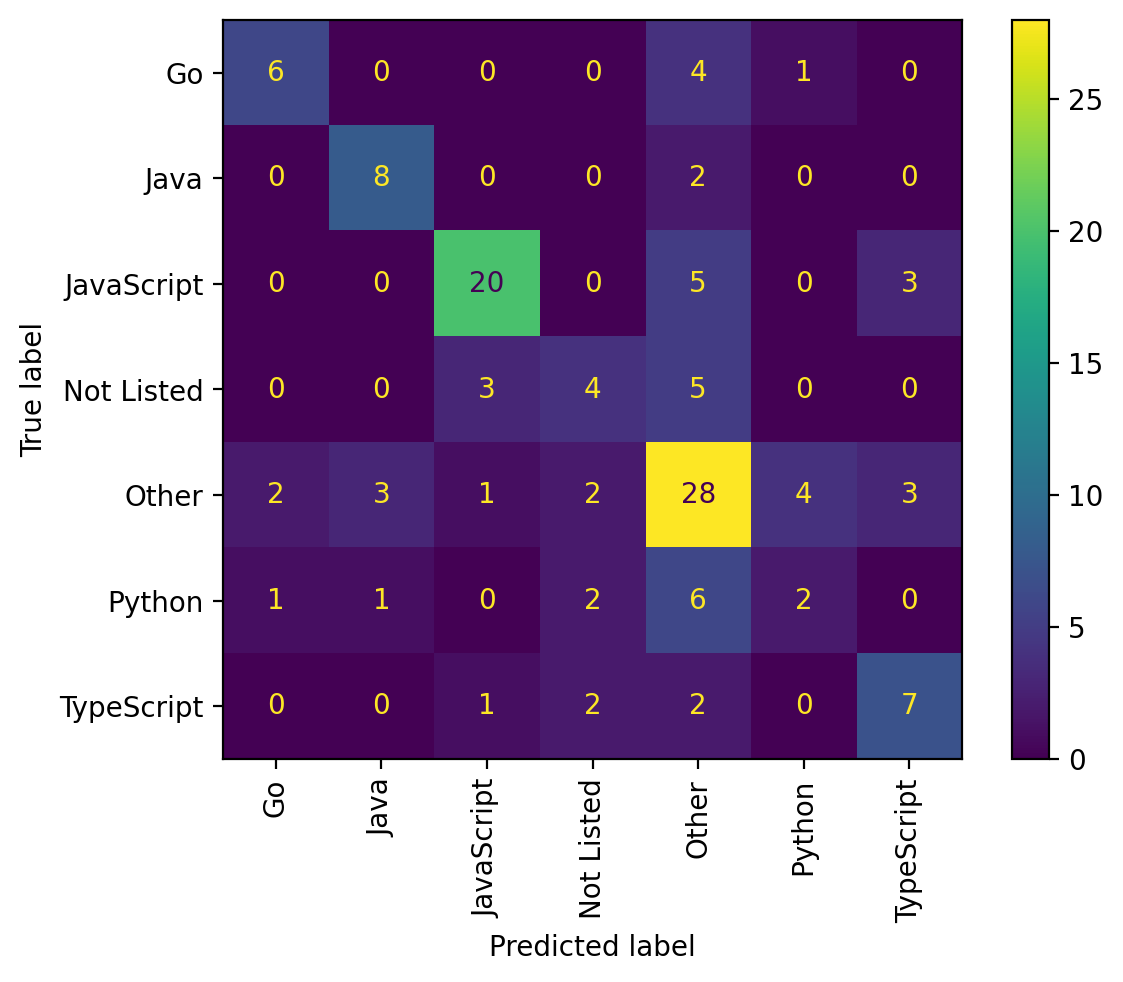

In [43]:
reload(m)
m.run_test(test_x,test_y,xg_boost)
m.model_and_evaluate(test_x,test_y,random_forest)